In [1]:
!pip install --upgrade pandas-datareader

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [17]:
s = pd.Series([1,2,3,4], name='daily returns')
s

0    1
1    2
2    3
3    4
Name: daily returns, dtype: int64

In [4]:
s * 100

0     81.025631
1     75.256725
2   -178.172987
3     58.684763
Name: daily returns, dtype: float64

In [5]:
np.abs(s)

0    0.810256
1    0.752567
2    1.781730
3    0.586848
Name: daily returns, dtype: float64

In [6]:
s.describe()

count    4.000000
mean     0.091985
std      1.252728
min     -1.781730
25%     -0.005297
50%      0.669707
75%      0.766990
max      0.810256
Name: daily returns, dtype: float64

In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']

In [8]:
s

AMZN    0.810256
AAPL    0.752567
MSFT   -1.781730
GOOG    0.586848
Name: daily returns, dtype: float64

In [9]:
s['AMZN']

0.8102563073555797

In [10]:
s['AMZN']=0
s

AMZN    0.000000
AAPL    0.752567
MSFT   -1.781730
GOOG    0.586848
Name: daily returns, dtype: float64

In [12]:
'AAPL' in s

True

In [24]:
df = pd.read_csv('C:/Users/hufs/test.csv')

In [25]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [26]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [28]:
df[['country', 'year']]

,country,year
0,Argentina,2000
1,Australia,2000
2,India,2000
3,Israel,2000
4,Malawi,2000
5,South Africa,2000
6,United States,2000
7,Uruguay,2000


In [30]:
df.iloc[2:5, 0:3]

,country,country isocode,year
2,India,IND,2000
3,Israel,ISR,2000
4,Malawi,MWI,2000


In [31]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [34]:
df = df[['country', 'POP', 'tcgdp']]

In [35]:
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [36]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [37]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [41]:
df

,population,total GDP,populoation
country,,,
Argentina,3.733565e+07,2.950722e+05,3.733565e+07
Australia,1.905319e+07,5.418047e+05,1.905319e+07
India,1.006300e+09,1.728144e+06,1.006300e+09
Israel,6.114570e+06,1.292539e+05,6.114570e+06
Malawi,1.180150e+07,5.026222e+03,1.180150e+07
South Africa,4.506410e+07,2.272424e+05,4.506410e+07
United States,2.821720e+08,9.898700e+06,2.821720e+08
Uruguay,3.219793e+06,2.525596e+04,3.219793e+06


In [42]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,populoation,GDP percap
country,,,,
Argentina,3.733565e+07,2.950722e+05,3.733565e+07,7903.229085
Australia,1.905319e+07,5.418047e+05,1.905319e+07,28436.433261
India,1.006300e+09,1.728144e+06,1.006300e+09,1717.324719
Israel,6.114570e+06,1.292539e+05,6.114570e+06,21138.672749
Malawi,1.180150e+07,5.026222e+03,1.180150e+07,425.896679
South Africa,4.506410e+07,2.272424e+05,4.506410e+07,5042.647686
United States,2.821720e+08,9.898700e+06,2.821720e+08,35080.381854
Uruguay,3.219793e+06,2.525596e+04,3.219793e+06,7843.970620


In [43]:
del df['populoation']

In [44]:
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


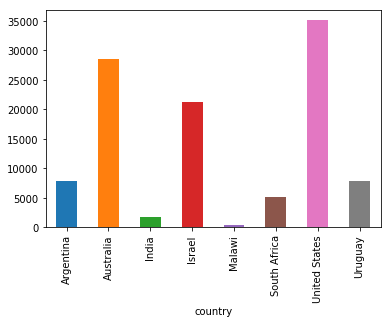

In [45]:
df['GDP percap'].plot(kind='bar')
plt.show()

In [46]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


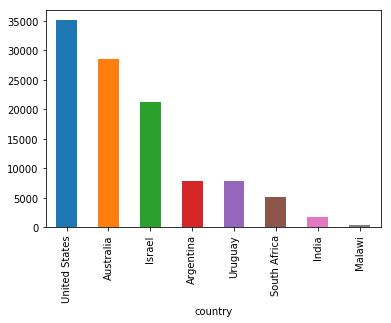

In [47]:
df['GDP percap'].plot(kind='bar')
plt.show()

In [48]:
Udata = pd.read_csv('C:/Users/hufs/raw_data_file2_SKY.csv')

In [49]:
Udata

,Total ranking,Economics,Business,Arts and Humanitties,Modern linguistics,English Literatrue,Finance & Accounting,Sociology
0,1,1.0,1.0,1.0,1.0,2.0,1.0,1.0
1,2,4.0,4.0,2.0,6.0,3.0,4.0,2.0
2,3,2.0,2.0,3.0,2.0,1.0,2.0,3.0
3,4,6.0,7.0,8.0,10.0,5.0,6.0,NaN
4,5,3.0,3.0,4.0,5.0,6.0,3.0,4.0
5,6,5.0,5.0,5.0,4.0,8.0,5.0,5.0
6,7,9.0,8.0,9.0,7.0,7.0,NaN,6.0
7,8,8.0,9.0,NaN,NaN,NaN,NaN,NaN
8,9,7.0,6.0,7.0,8.0,NaN,7.0,7.0
9,10,10.0,NaN,6.0,3.0,4.0,NaN,NaN


In [50]:
Udata.corr('spearman')

,Total ranking,Economics,Business,Arts and Humanitties,Modern linguistics,English Literatrue,Finance & Accounting,Sociology
Total ranking,1.000000,0.866667,0.818182,0.733333,0.503030,0.666667,0.750000,1.000000
Economics,0.866667,1.000000,0.966667,0.833333,0.533333,0.547619,1.000000,0.857143
Business,0.818182,0.966667,1.000000,0.928571,0.900000,0.714286,0.964286,0.857143
Arts and Humanitties,0.733333,0.833333,0.928571,1.000000,0.716667,0.666667,0.857143,0.964286
Modern linguistics,0.503030,0.533333,0.900000,0.716667,1.000000,0.547619,0.857143,0.750000
English Literatrue,0.666667,0.547619,0.714286,0.666667,0.547619,1.000000,0.657143,0.771429
Finance & Accounting,0.750000,1.000000,0.964286,0.857143,0.857143,0.657143,1.000000,0.828571
Sociology,1.000000,0.857143,0.857143,0.964286,0.750000,0.771429,0.828571,1.000000


In [51]:
Udata1 = Udata.corr('spearman')

In [52]:
Udata1

,Total ranking,Economics,Business,Arts and Humanitties,Modern linguistics,English Literatrue,Finance & Accounting,Sociology
Total ranking,1.000000,0.866667,0.818182,0.733333,0.503030,0.666667,0.750000,1.000000
Economics,0.866667,1.000000,0.966667,0.833333,0.533333,0.547619,1.000000,0.857143
Business,0.818182,0.966667,1.000000,0.928571,0.900000,0.714286,0.964286,0.857143
Arts and Humanitties,0.733333,0.833333,0.928571,1.000000,0.716667,0.666667,0.857143,0.964286
Modern linguistics,0.503030,0.533333,0.900000,0.716667,1.000000,0.547619,0.857143,0.750000
English Literatrue,0.666667,0.547619,0.714286,0.666667,0.547619,1.000000,0.657143,0.771429
Finance & Accounting,0.750000,1.000000,0.964286,0.857143,0.857143,0.657143,1.000000,0.828571
Sociology,1.000000,0.857143,0.857143,0.964286,0.750000,0.771429,0.828571,1.000000


In [55]:
Udata1 = Udata1.sort_values(by='Total ranking', ascending=False)
Udata1

,Total ranking,Economics,Business,Arts and Humanitties,Modern linguistics,English Literatrue,Finance & Accounting,Sociology
Total ranking,1.000000,0.866667,0.818182,0.733333,0.503030,0.666667,0.750000,1.000000
Sociology,1.000000,0.857143,0.857143,0.964286,0.750000,0.771429,0.828571,1.000000
Economics,0.866667,1.000000,0.966667,0.833333,0.533333,0.547619,1.000000,0.857143
Business,0.818182,0.966667,1.000000,0.928571,0.900000,0.714286,0.964286,0.857143
Finance & Accounting,0.750000,1.000000,0.964286,0.857143,0.857143,0.657143,1.000000,0.828571
Arts and Humanitties,0.733333,0.833333,0.928571,1.000000,0.716667,0.666667,0.857143,0.964286
English Literatrue,0.666667,0.547619,0.714286,0.666667,0.547619,1.000000,0.657143,0.771429
Modern linguistics,0.503030,0.533333,0.900000,0.716667,1.000000,0.547619,0.857143,0.750000


In [63]:
Udata1.loc[Udata1.index[0:9], ['Total ranking', 'Sociology', 'Economics', 'Business', 'Finance & Accounting', 'Arts and Humanitties', 'English Literatrue', 'Modern linguistics']] 

,Total ranking,Sociology,Economics,Business,Finance & Accounting,Arts and Humanitties,English Literatrue,Modern linguistics
Total ranking,1.000000,1.000000,0.866667,0.818182,0.750000,0.733333,0.666667,0.503030
Sociology,1.000000,1.000000,0.857143,0.857143,0.828571,0.964286,0.771429,0.750000
Economics,0.866667,0.857143,1.000000,0.966667,1.000000,0.833333,0.547619,0.533333
Business,0.818182,0.857143,0.966667,1.000000,0.964286,0.928571,0.714286,0.900000
Finance & Accounting,0.750000,0.828571,1.000000,0.964286,1.000000,0.857143,0.657143,0.857143
Arts and Humanitties,0.733333,0.964286,0.833333,0.928571,0.857143,1.000000,0.666667,0.716667
English Literatrue,0.666667,0.771429,0.547619,0.714286,0.657143,0.666667,1.000000,0.547619
Modern linguistics,0.503030,0.750000,0.533333,0.900000,0.857143,0.716667,0.547619,1.000000
